In [1]:
#* for data manipulation 
import pandas as pd 
import numpy as np 


from disk_analysis_tools import tiling_disk_plots as tdp
from disk_analysis_tools import tiling_disk_utils as tdu

#* for plotting: 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
sns.set_theme(style="ticks")
sns.set_context("talk", )
#

# triplets v6 experiment analysis

In [2]:
exp_db = tdu.query_exp_db()

In [3]:
exp_id = 24
exp_db.loc[exp_db.exp_id == exp_id].exp_description.values[0]

'triplets v6: blue: v=3.3mm/s; brown:v=3.8mm/s; v=4.5mm/s; blue tip'

In [4]:
meta_data = tdu.fetch_meas_metadata(exp_id=exp_id)
meta_data

measurement_id  exp_id        date                             file_name  \
0             125      24  31.03.2022  20220331_trip_v6_blue_bfg_vacoff.txt   
1             126      24  01.04.2022      20220401_trip_v6_blue_curing.txt   

  material process_step vac_mapping                       coordinates  \
0    steel  before_glue    [1,1000]  coordinate-blue-brown-yellow.txt   
1    steel       curing    [n,1000]  coordinate-blue-brown-yellow.txt   

   meas_cap_status                  comments  
0                1   reference before gluing  
1                1  curing process; Reps: 24

In [5]:
meas_id_bg = 125
meas_id_sig = 126

20220331_trip_v6_blue_bfg_vacoff.txt
Reading data...
Reading done
control plots precut
control plots post
20220401_trip_v6_blue_curing.txt
Reading data...
Reading done
control plots precut
control plots post
Background Data:
Total points removed: 388
Total points removed: 0.06%
Signal Data:
Total points removed: 5661
Total points removed: 0.81%
Run: 1
-------pt-------
     hex_nr  point     unix_time      x      y    z_err_s  z_mean_s  \
0         3      2  1.648807e+09 -29.27 -43.95  13.590155       0.0   
1         3      3  1.648807e+09 -23.44 -47.32  13.590155       0.0   
2         3      4  1.648807e+09 -20.07 -53.15   0.000000       0.0   
3         3      5  1.648807e+09 -13.31 -51.33   0.000000       0.0   
4         3      6  1.648807e+09 -15.31 -46.51   0.000000       0.0   
..      ...    ...           ...    ...    ...        ...       ...   
526      19     56  1.648805e+09 -90.89  30.43  12.812921       0.0   
527      19     57  1.648806e+09 -84.38  33.13   0.000000    

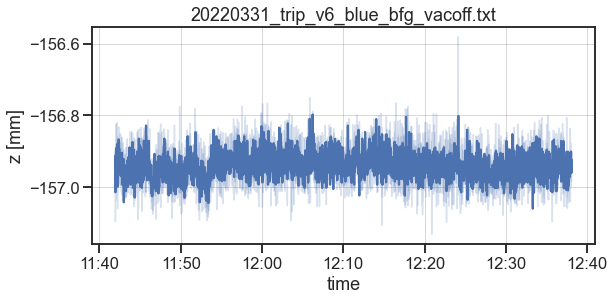

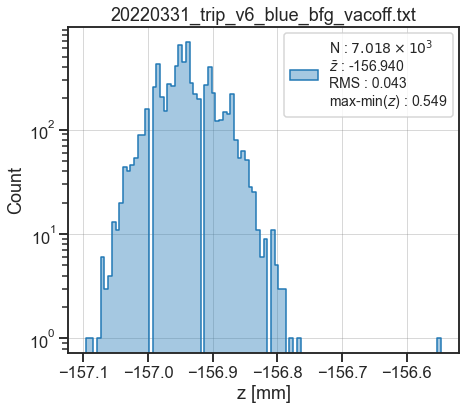

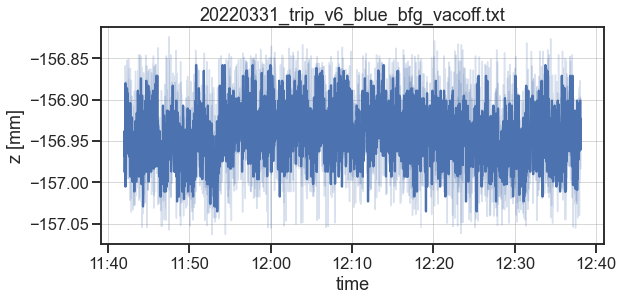

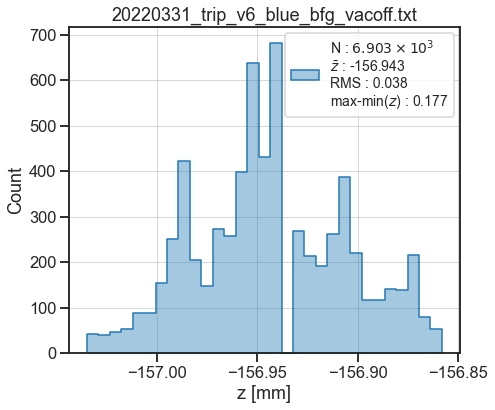

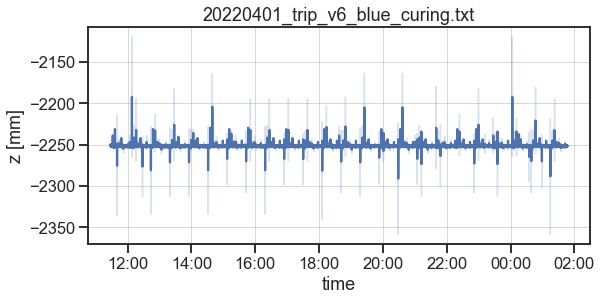

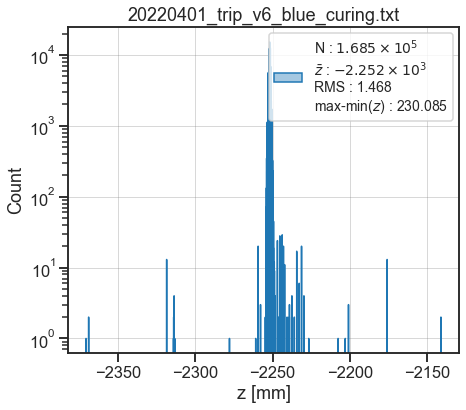

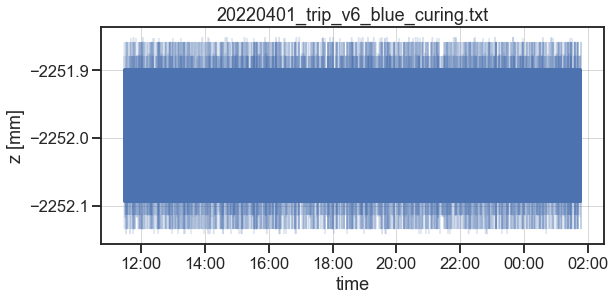

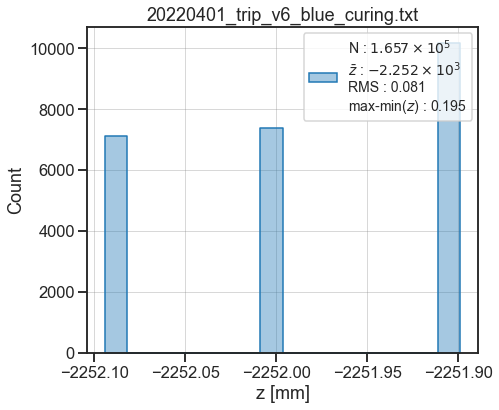

In [6]:
v6_data_pt = tdu.laser_data_analysis(meas_id_sig, #* meas signal
                                           meas_id_bg, #* meas bg
                                           meta_data, 
                                           folder='triplets',
                                            bg_data_check=True, 
                                            sig_data_check=True,
                                            print_removed_points=True,
                                            )

This measurement is broken! Wont produce usefull results

In [7]:
result_df= tdu.calc_flats_statistic_df(v6_data_pt)
result_df.tail()

R    deltaR        RMS   unix_time  run_nr  \
19  113.818182  3.940966  18.102734  1648847140      20   
20  113.818182  2.994251  18.102734  1648849286      21   
21  113.818182  2.994251  18.102734  1648851434      22   
22  113.818182  2.994251  18.102734  1648853581      23   
23  113.818182  2.994251  18.102734  1648855729      24   

                              datetime     time_h  odd_runs  
19 2022-04-01 23:05:40.971316224+02:00  11.327500         0  
20 2022-04-01 23:41:26.292483584+02:00  11.923611         1  
21 2022-04-02 00:17:14.506736640+02:00  12.520278         0  
22 2022-04-02 00:53:01.656381696+02:00  13.116667         1  
23 2022-04-02 01:28:49.412141824+02:00  13.713333         0

(curing, vac off)


c:\Users\Domin\Nextcloud\Master\Disk_Tiling_Measurements\MADMAX_disk_analysis\analysis_notebooks\disk_analysis_tools\tiling_disk_plots.py:113: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize,  constrained_layout=False)


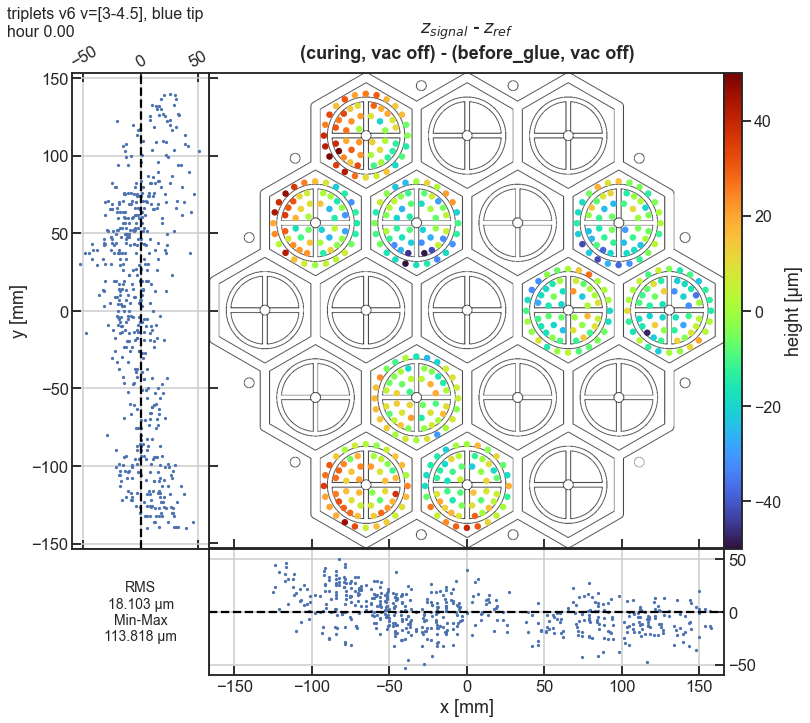

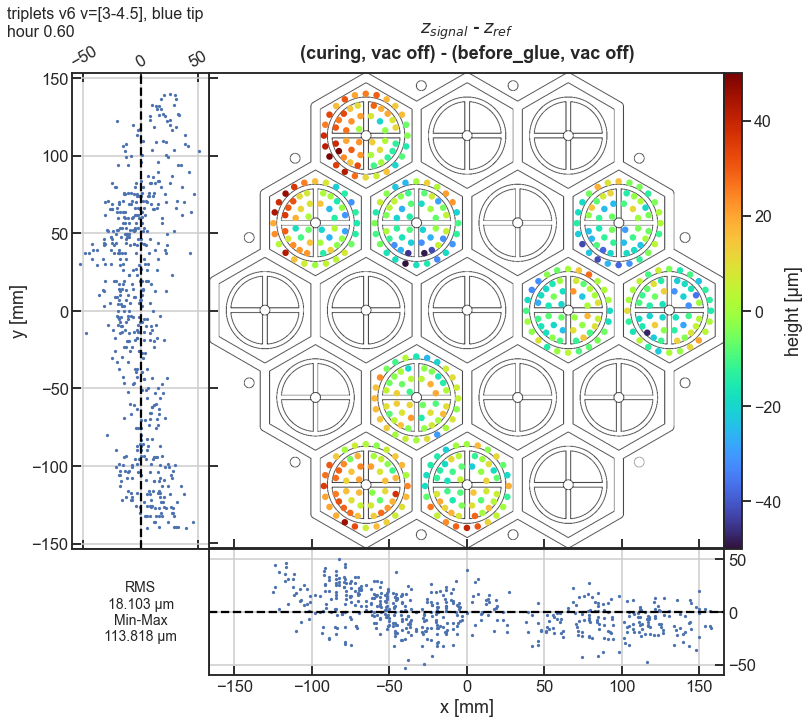

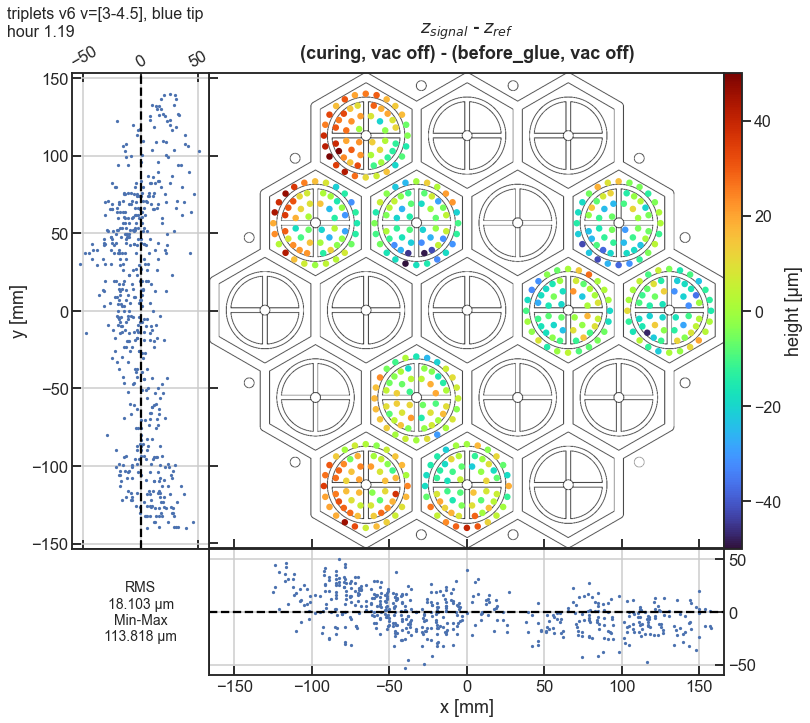

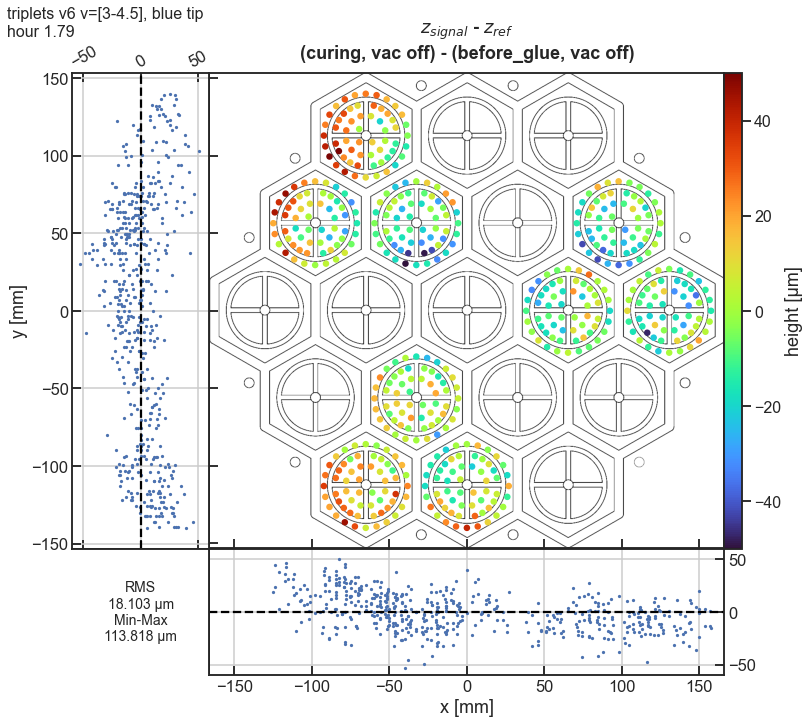

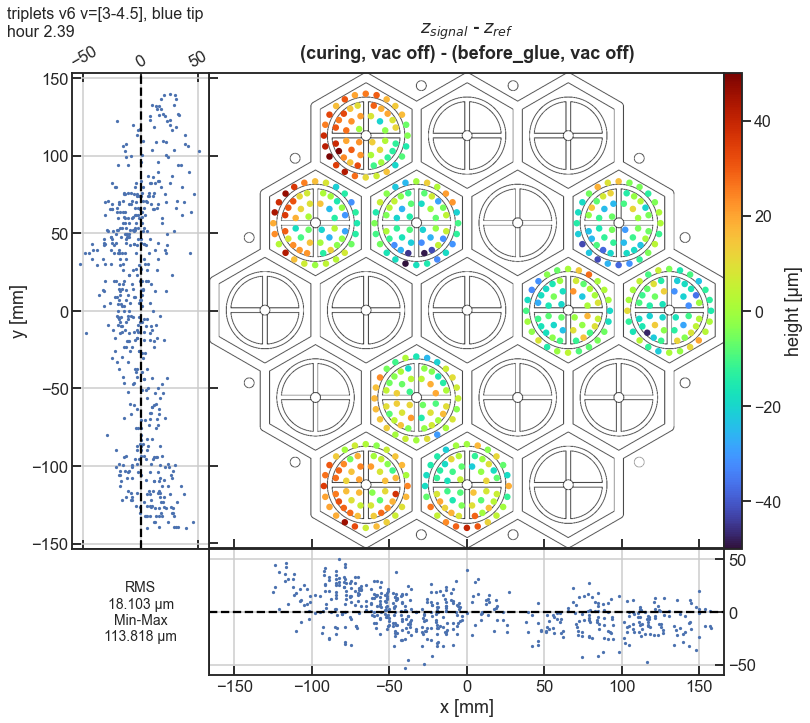

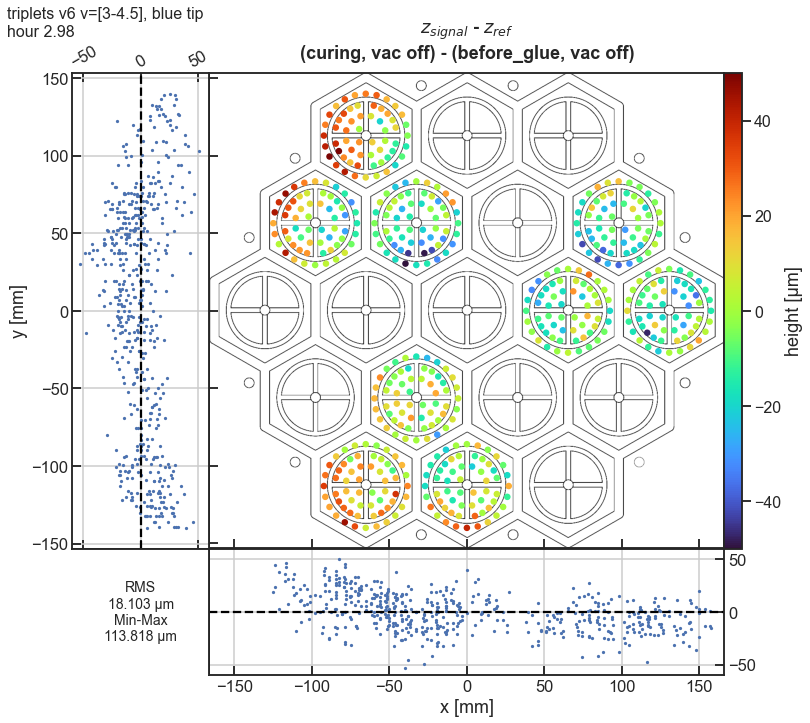

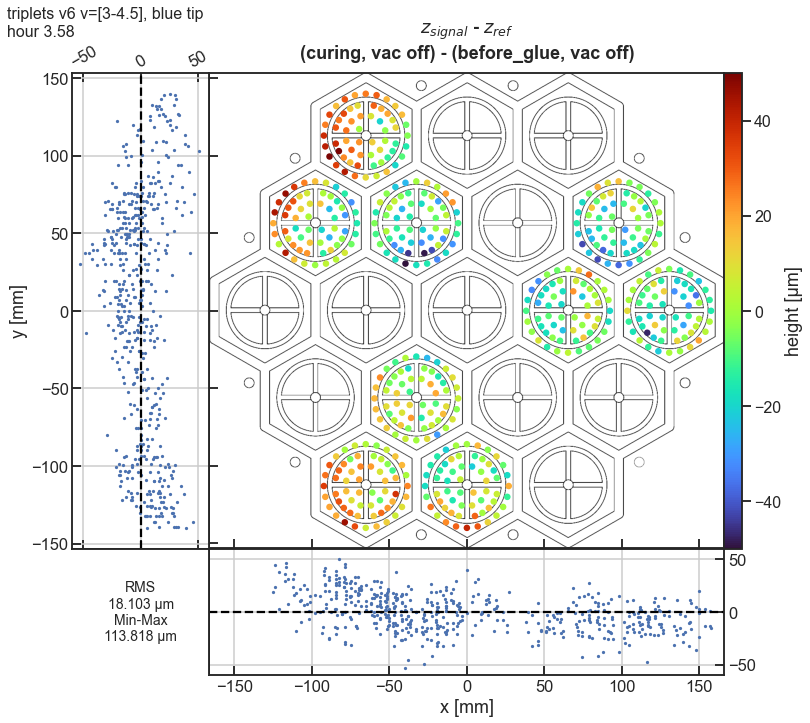

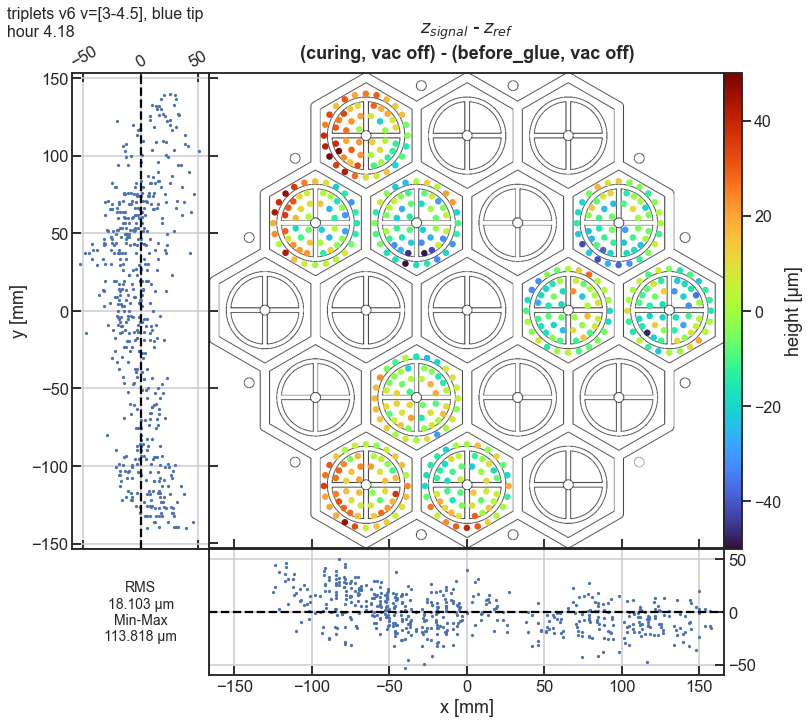

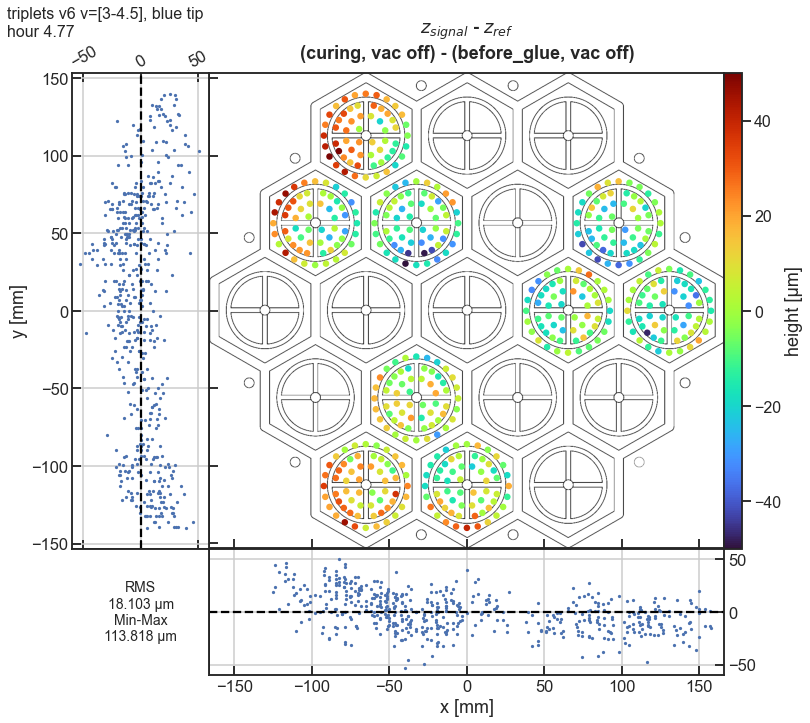

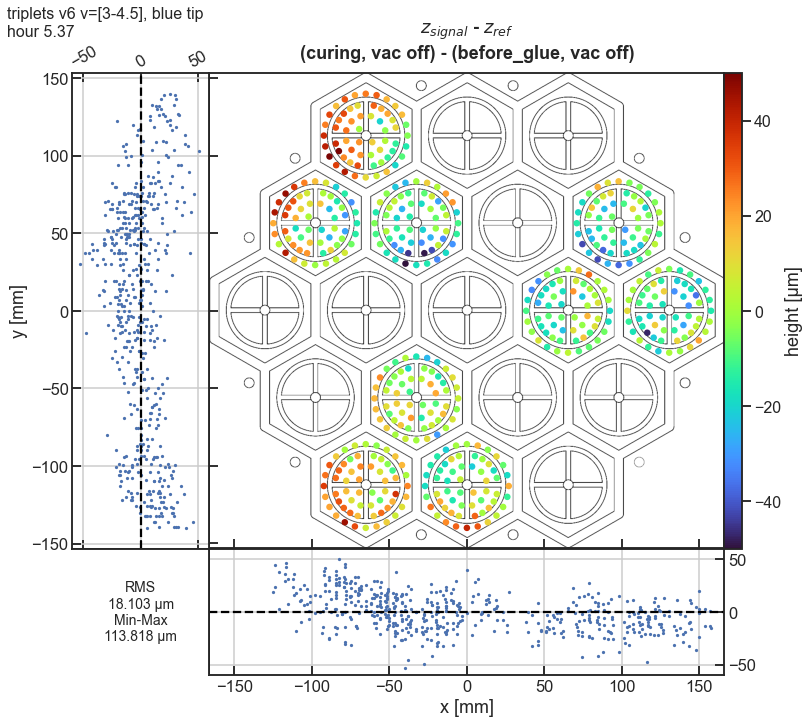

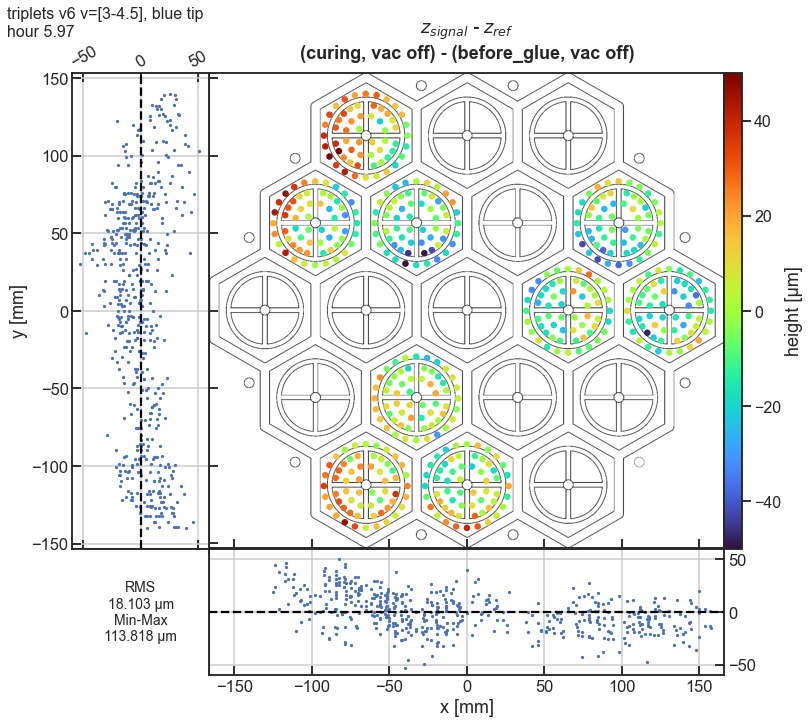

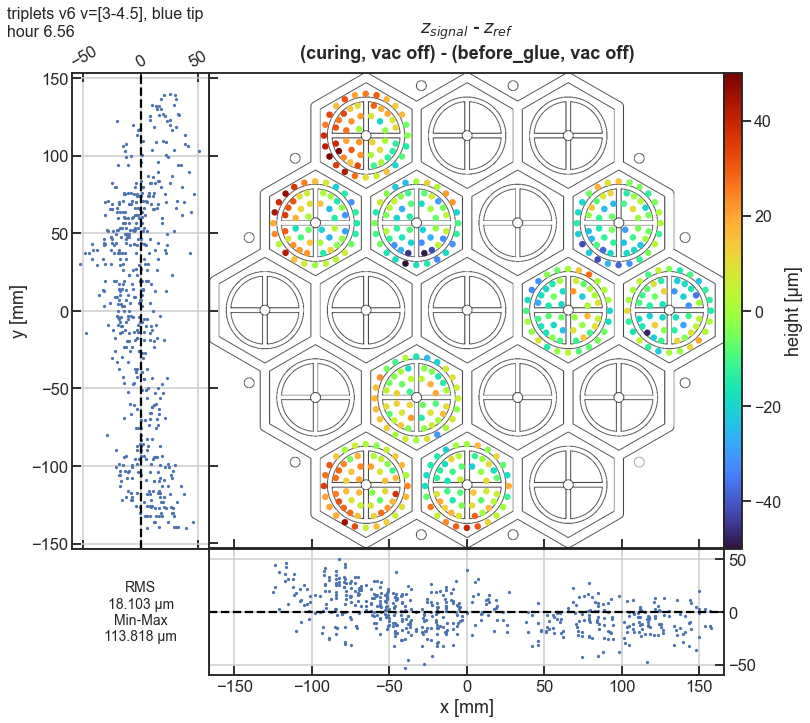

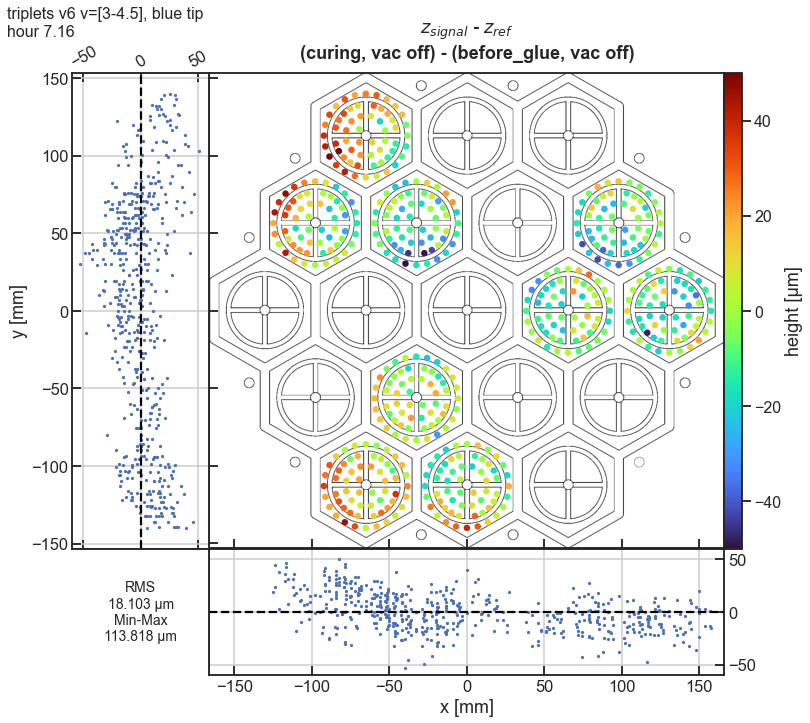

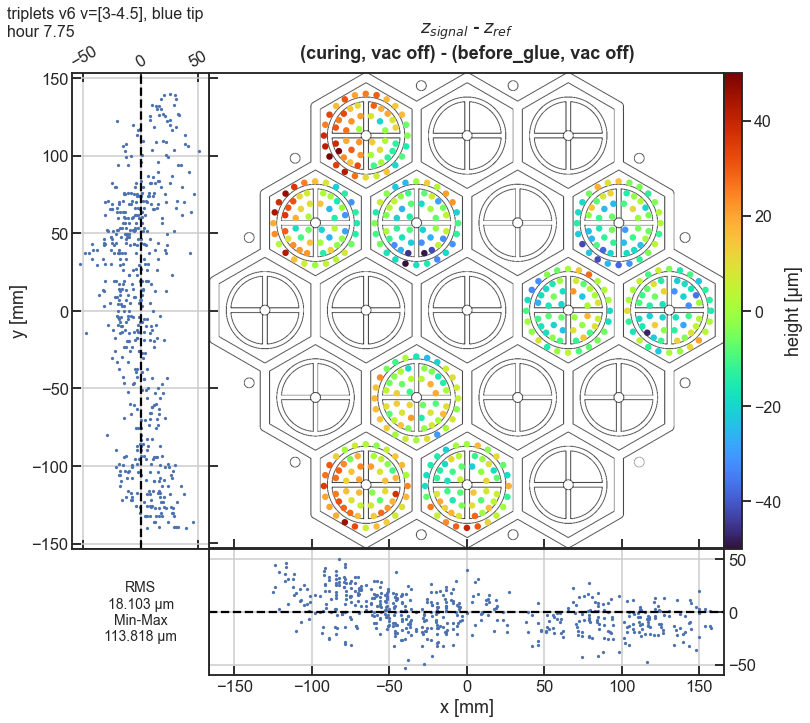

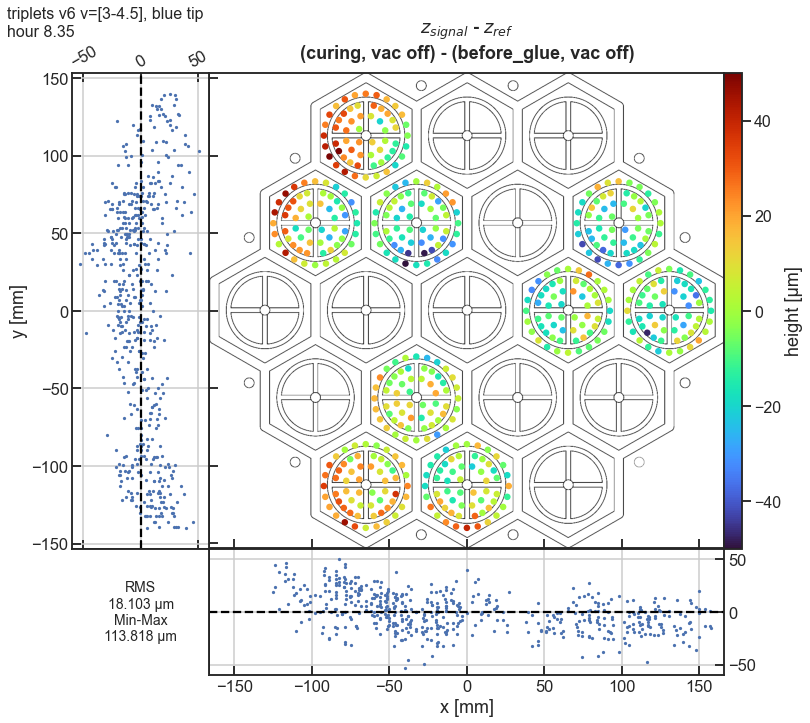

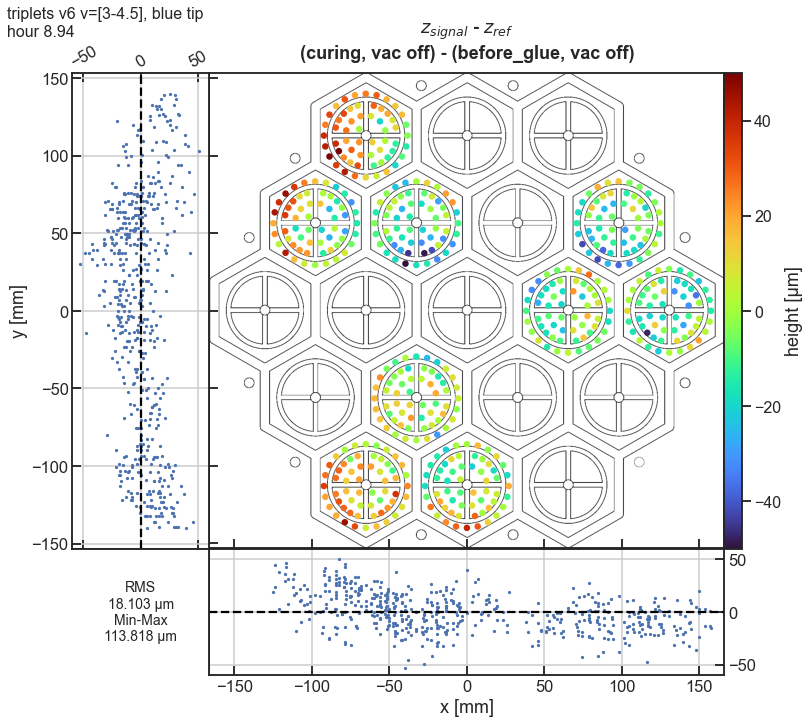

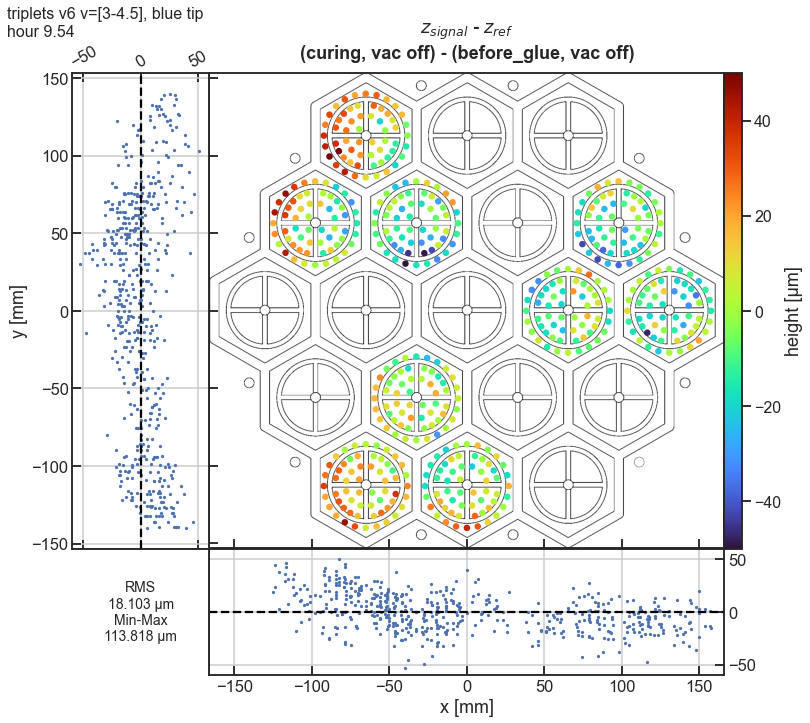

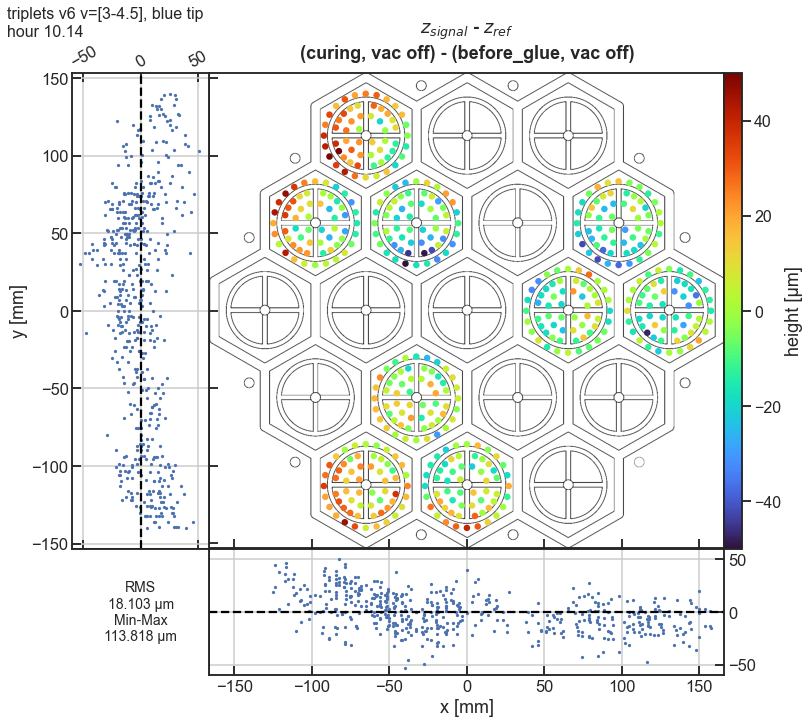

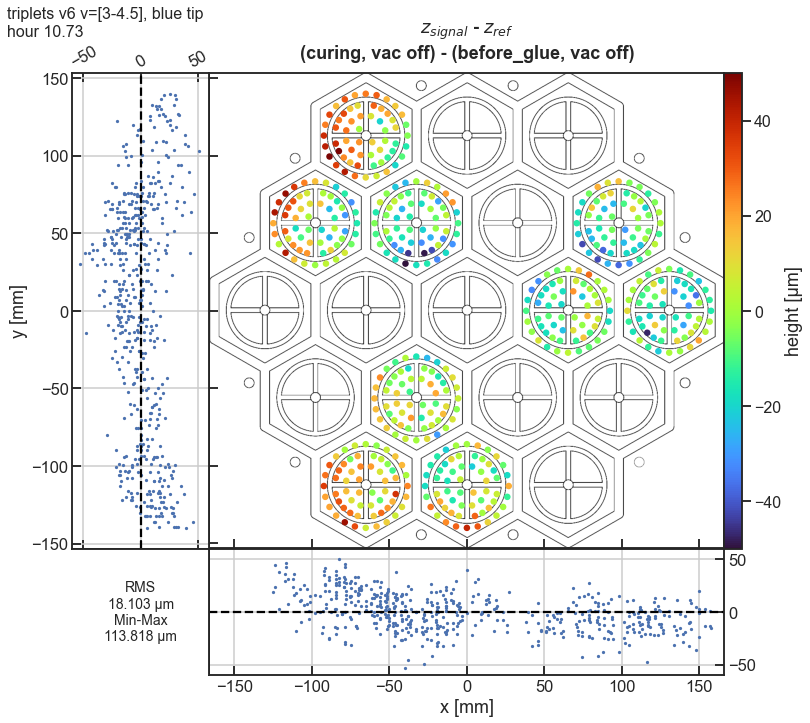

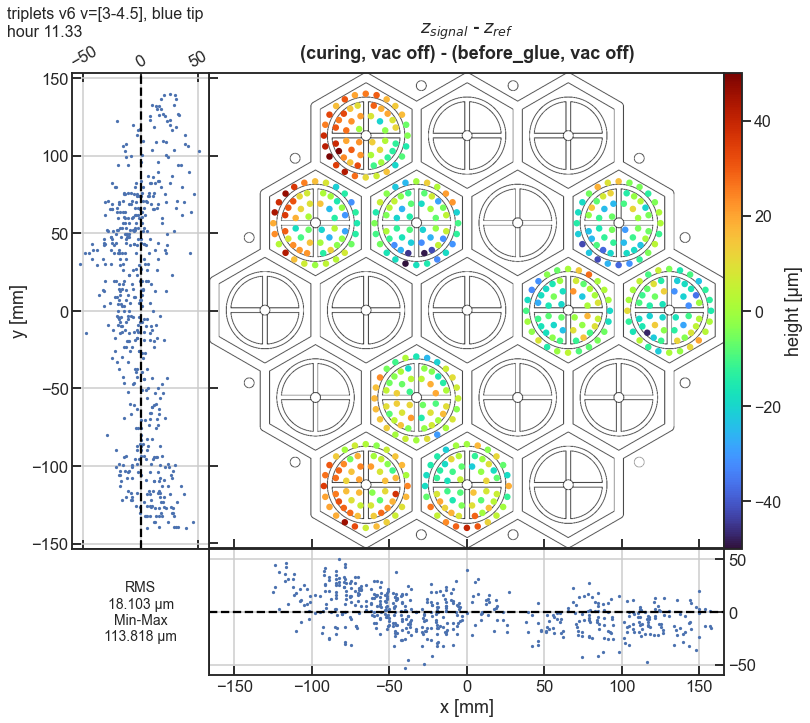

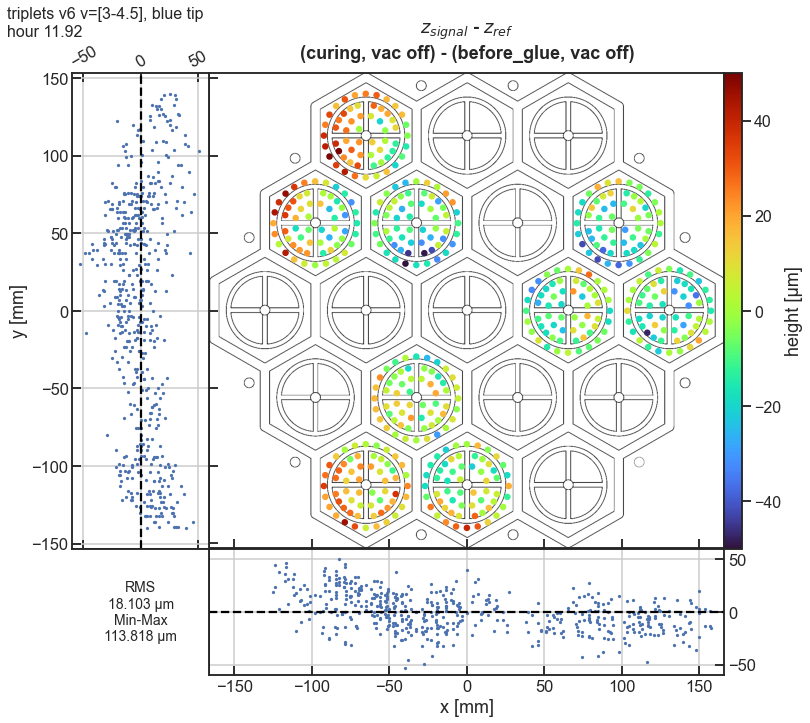

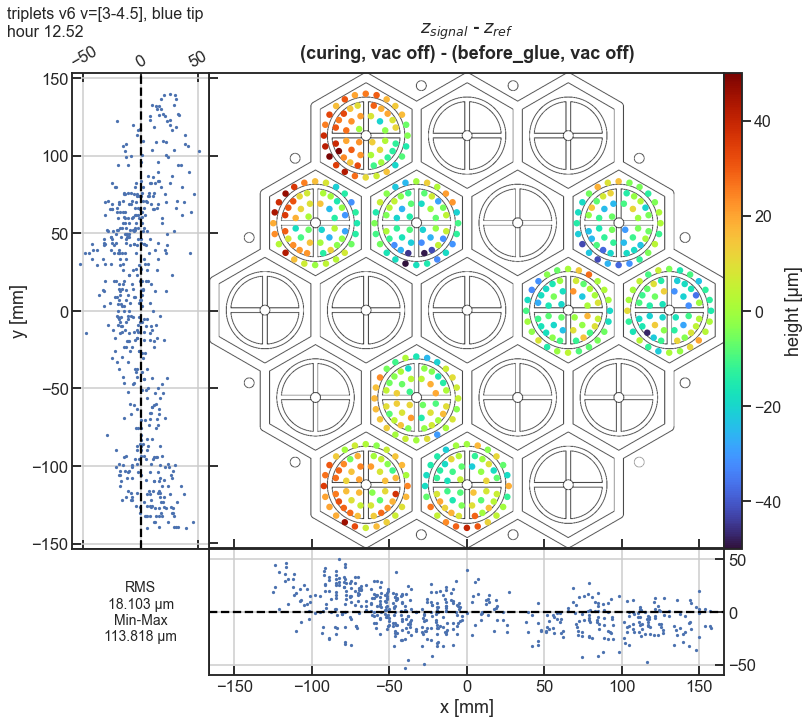

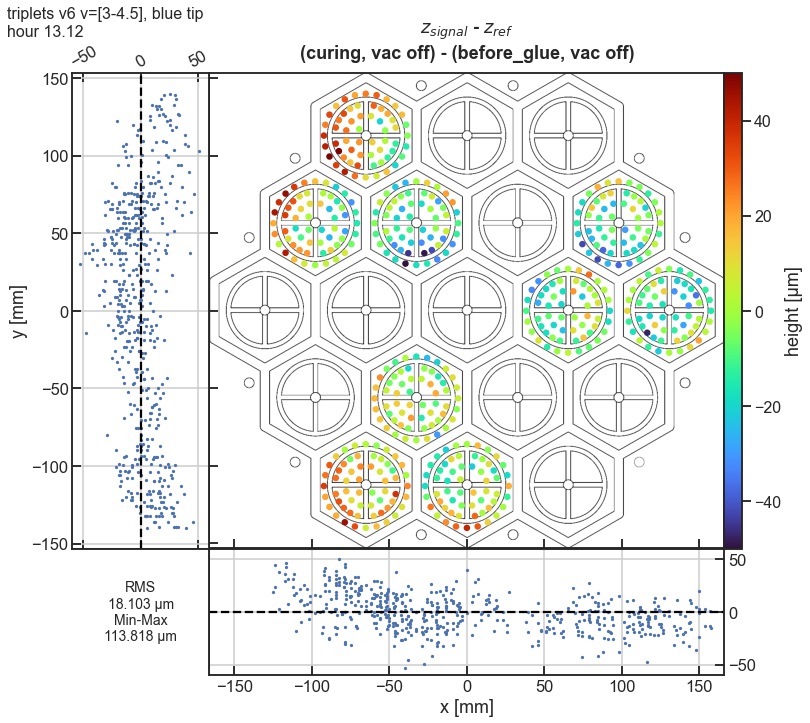

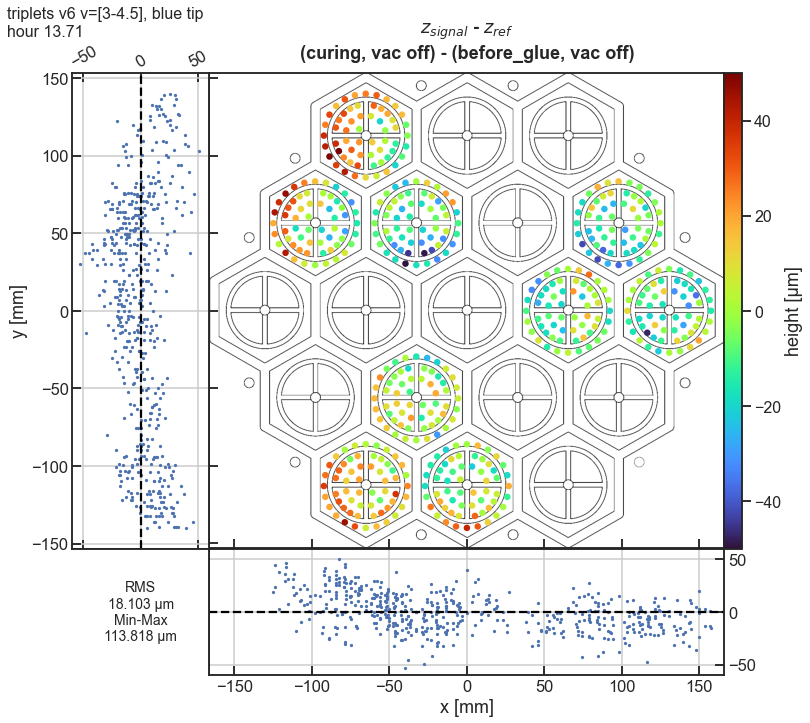

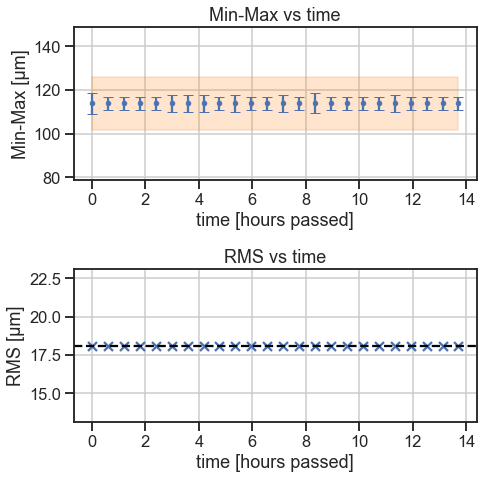

In [8]:
tdp.plot_analysis_results(exp_id, #*exp id
                          v6_data_pt, #* measurements dict
                          exp_db, #* experiments database
                          meta_data, #* meta data df
                          meas_id_sig= meas_id_sig,
                          meas_id_bg = meas_id_bg,
                        #   plot_runs=[1,2,24,25],
                          joyplot=False,hexagon_flatness=True, R_vs_t=True, triplet=False)

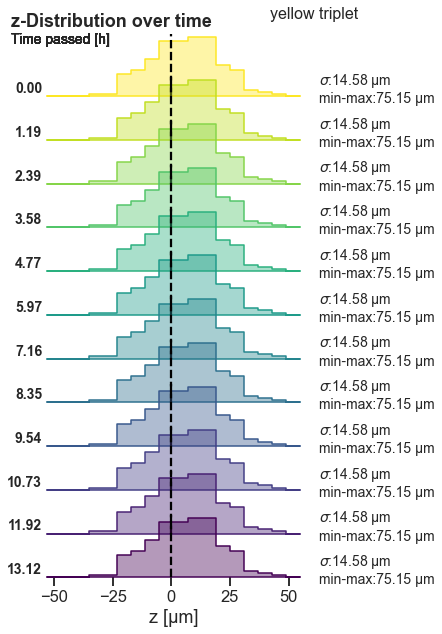

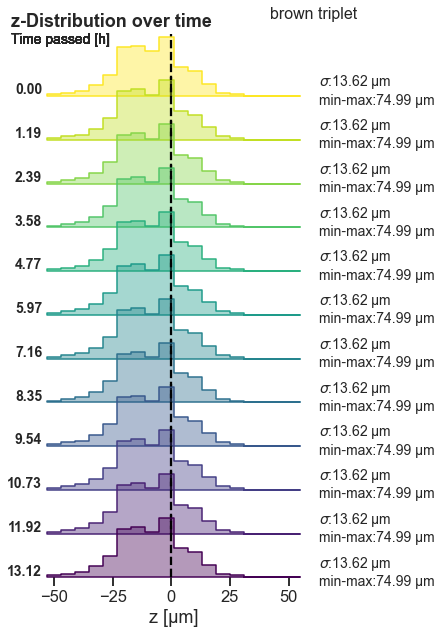

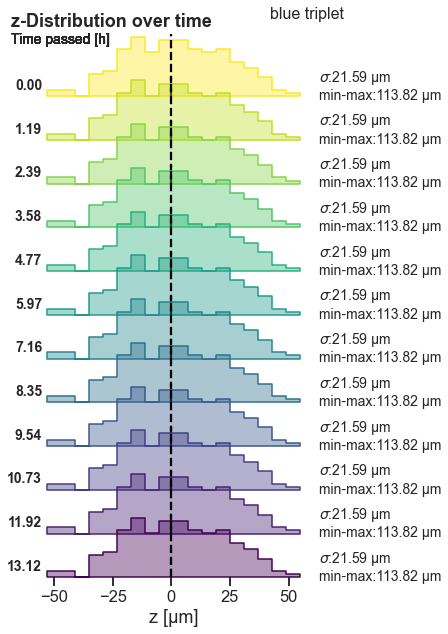

In [9]:
tdp.plot_analysis_results(exp_id, #*exp id
                          v6_data_pt, #* measurements dict
                          exp_db, #* experiments database
                          meta_data, #* meta data df
                          meas_id_sig= meas_id_sig,
                          meas_id_bg = meas_id_bg,
                          plot_runs=[1,24,25,26,27,49],
                          joyplot=True,hexagon_flatness=False, R_vs_t=False, triplet=True, joyplot_summary_stats=True)

## These measurements are not just reproducing the background! These are NO resulsts!